<a href="https://colab.research.google.com/github/Subhash11520/PRODIGY_GA_02/blob/main/Image_Generation_With_Pre_Trained_Models_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ================================
# 🧰 Install Required Libraries
# ================================
!pip install diffusers transformers accelerate safetensors --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import json

# Paths to input and output notebook
input_path = "/content/drive/My Drive/Image_Generation_With_Pre_Trained_Models_FIXED.ipynb"
output_path = "/content/drive/My Drive/Image_Generation_With_Pre_Trained_Models_FIXED2.ipynb"

# Load notebook JSON
with open(input_path, "r", encoding="utf-8") as f:
    notebook = json.load(f)

# Fix: remove invalid 'widgets' metadata
if 'widgets' in notebook.get('metadata', {}):
    del notebook['metadata']['widgets']

# Save fixed notebook
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(notebook, f, indent=2)

print(f"✅ Fixed notebook saved as: {output_path}")


✅ Fixed notebook saved as: /content/drive/My Drive/Image_Generation_With_Pre_Trained_Models_FIXED2.ipynb


In [4]:
# ================================
# 🔃 Import Dependencies
# ================================
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
# ================================
# ⚙️ Load Stable Diffusion Model
# ================================
model_id = "stabilityai/stable-diffusion-2-1"

# Load model (no login required)
pipe = StableDiffusionPipeline.from_pretrained(model_id)

# Detect and use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [6]:
# ================================
# 🖼️ Generate Image from Text Prompt
# ================================
prompt = "a serene mountain landscape with a river and trees, 4K, highly detailed"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

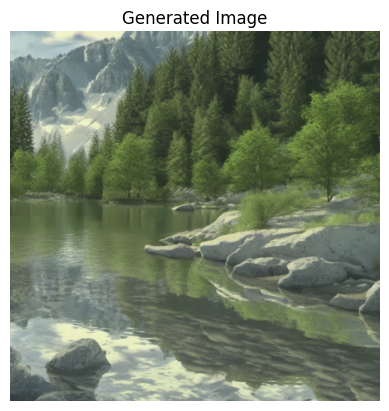

In [7]:
# ================================
# 📷 Display Image
# ================================
plt.imshow(image)
plt.axis("off")
plt.title("Generated Image")
plt.show()

In [8]:
# ================================
# 💾 Save Image Locally
# ================================
output_path = "generated_image.png"
image.save(output_path)
print(f"✅ Image saved as: {output_path}")

✅ Image saved as: generated_image.png
